In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import os
import cv2

In [2]:
def plot_imagens(imagens, altura, largura, n_linhas, n_cols, amostra):
    '''Para a visualização das imagens'''
    plt.figure(figsize = (2.5 * n_cols, 2.5 * n_linhas))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)
    for i in range(n_linhas * n_cols):
        plt.subplot(n_linhas, n_cols, i + 1)
        plt.imshow(imagens[amostra[i]].reshape((altura, largura)), cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())

In [3]:
def preto_e_branco(rgb):
    '''Converte a imagem colorida para uma imagem em preto e branco'''
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

In [4]:
def distancia_euclidiana(imagem_teste, img_media, caracteristicas):
    '''calcula a distancia euclidiana'''
    
    img = cv2.imread(img_media)
    res = cv2.resize(img, dsize=(64, 64), interpolation=cv2.INTER_CUBIC)
    
    imgtest = preto_e_branco(res)
    imgtest = np.array(imgtest)

    matriz_teste = imgtest.reshape(imgtest.shape[0], imgtest.shape[1]*imgtest.shape[2])
    
    img_crctr = matriz_teste - img_media
    U, S, VT = np.linalg.svd(imgs_crctr)
    
    S0 = np.zeros(imgs_cent.shape)
    S0[:S.shape[0], :S.shape[0]] = np.diag(S)
    
    img_crctr = VT[:250]

    
    caracteristicas = caracteristicas.reshape(caracteristicas.shape[0], caracteristicas.shape[1]*caracteristicas.shape[2])
    
    df =[]
    for i in caracteristicas:
        df.append((img_crctr - i)**2)
    
    dst = []
    for i in df:
        dst.append((sum(np.array(i))**(1/2))
                   
    indice = dst.index(min(dst))
    
    return indice 
    
    

SyntaxError: invalid syntax (<ipython-input-4-1081dd54e828>, line 31)

Quantidade total de imagens: 15747.


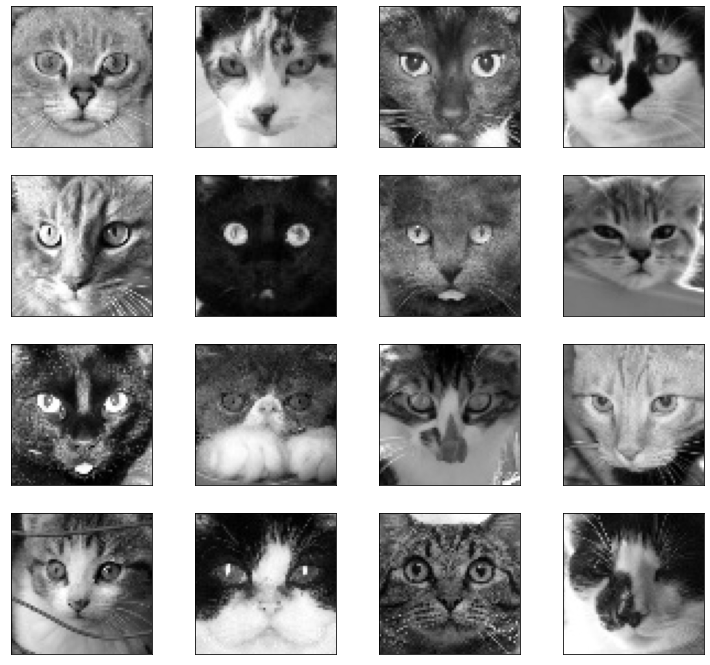

In [5]:
dir = os.getcwd() + '/imgs/cats' #diretório
nomes_imgs = os.listdir(dir)[:-1] #nomes das imagens

#lista dos paths para cada imagem:
path_imgs=[]
for nome in nomes_imgs:
    path_imgs.append(dir + '/' + nome)

imgs = np.array([plt.imread(img) for img in path_imgs]) #cria array das imgs

#Tranforma cada img colorida em preto e branco:
imgs_bw = []
for imagem in imgs:
    imgs_bw.append(preto_e_branco(imagem))
imgs_bw = np.array(imgs_bw)

#plota algumas imagens usando a função criada no começo:
num_imgs, altura, largura = imgs_bw.shape

amostra = random.sample(range(0, imgs_bw.shape[0]), 16) #amostra aleatória de imagens para plotar

plot_imagens(imgs_bw, altura, largura, n_linhas = 4, n_cols = 4, amostra=amostra)
print(f'Quantidade total de imagens: {imgs_bw.shape[0]}.')

In [7]:
# Transformando a array imgs_bw (de 3 dimensões) em uma matriz (array de 2 dim) em que cada imagem é uma linha
matriz_imgs = imgs_bw.reshape(imgs_bw.shape[0], imgs_bw.shape[1]*imgs_bw.shape[2])
matriz_imgs.shape # Para conferir se deu certo

(15747, 4096)

In [8]:
#Centralizando as imagens:
media = np.mean(matriz_imgs, axis = 0)
imgs_cent = matriz_imgs - media

In [9]:
#Centralizando as imagens:
media = np.mean(matriz_imgs, axis = 0)
imgs_cent = matriz_imgs - media

In [10]:
# Calculando a SVD das imagens
U, S, VT = np.linalg.svd(imgs_cent)

In [11]:
# Transformando S em uma matriz diagonal com o mesmo tamanho que imgs_cent (já que estamos calculando a decomposição dela)
S0 = np.zeros(imgs_cent.shape)
S0[:S.shape[0], :S.shape[0]] = np.diag(S)
np.allclose(U.dot(S0.dot(VT)), imgs_cent) # Para confirmar se deu certo

True

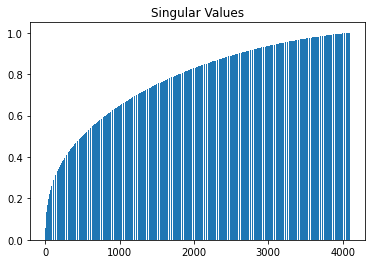

In [12]:
#Verificando a quantidade de componentes para selecionar
plt.figure()
plt.title('Singular Values')
plt.bar(range(len(S)), np.cumsum(S)/np.sum(S))
plt.show()

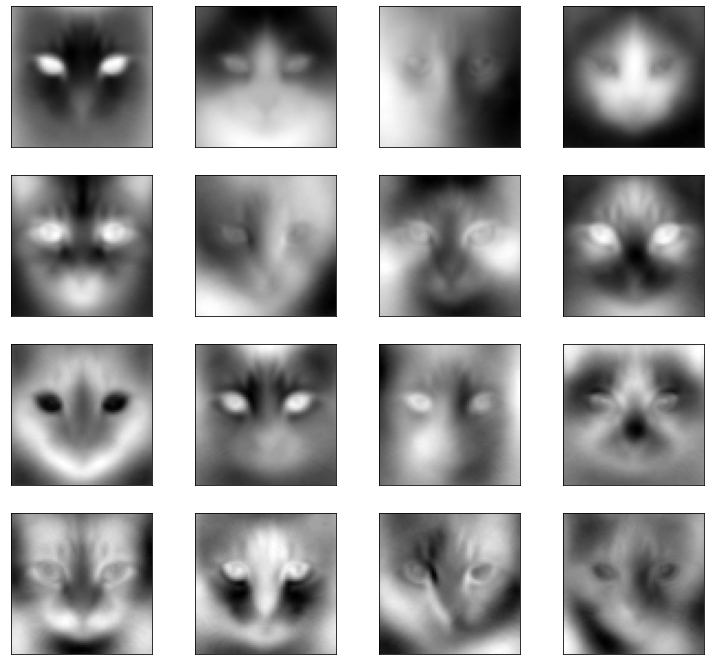

In [52]:
# Selecionando algumas eigenfaces e plotando o resultado
n_comp = 4096
C = VT[:n_comp]
#print(C.shape)
eigenfaces = C.reshape((n_comp, 64, 64))
#print(eigenfaces.shape)
plot_imagens(eigenfaces, altura, largura, n_linhas = 4, n_cols = 4, amostra=range(0, C.shape[0])[:16])

In [96]:
def identificador_de_gatos(imagem, n_componentes):
    '''Retorna True ou False dependendo da proximidade da imagem com a de um gato'''
    img = plt.imread(imagem)
    img1 = preto_e_branco(img)
    img2 = cv2.resize(img1, dsize=(64,64), interpolation=cv2.INTER_CUBIC)
    img3 = img2.reshape((4096,))
    U_ = U[:n_componentes]
    (np.identity(n_componentes) - np.dot(U_,U_.T)).shape
    (img3 - media).shape
    p = np.dot(np.identity(n_componentes) - np.dot(U_,U_.T), img3 - media)
    d = np.linalg.norm(p)
    lim = 6.5e-12
    return d < lim, d

In [51]:
U_ = U[:n_comp]
U_.shape
np.dot(C.T,C).shape
#VT[0].shape
P = U[:,:n_comp]*S[:n_comp]
P.shape

(15747, 3500)

# Testando o algoritmo:

Funcionou bem com algumas fotos de gatos, e se mostrou bem aficaz em identificar coisas muito diferentes de gatos. Contudo, ainda apresentou algumas falhas, não identificando alguns gatos e identificando como gatos outros animais, como cães ou mesmo pessoas.

## Alguns casos que funcionaram bem:

(True, 5.700355155095794e-12)


([], [])

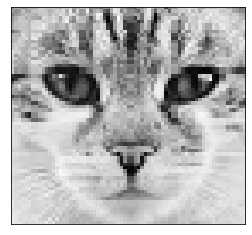

In [115]:
imagem = 'test/gato3.jpg'
print(identificador_de_gatos(imagem, n_comp))
plt.imshow(preto_e_branco(plt.imread(imagem)),cmap=plt.cm.gray) 
plt.xticks(())
plt.yticks(())

(True, 6.0779705970328585e-12)


([], [])

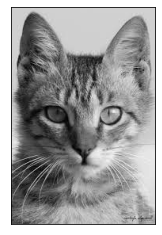

In [116]:
imagem = 'test/gato10.jpg'
print(identificador_de_gatos(imagem, n_comp))
plt.imshow(preto_e_branco(plt.imread(imagem)),cmap=plt.cm.gray) 
plt.xticks(())
plt.yticks(())

(False, 6.6743875647470874e-12)


([], [])

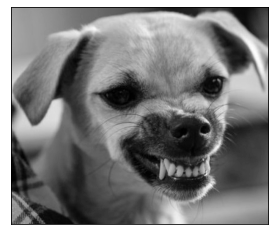

In [99]:
imagem = 'test/cao2.jpg'
print(identificador_de_gatos(imagem, n_comp))
plt.imshow(preto_e_branco(plt.imread(imagem)),cmap=plt.cm.gray) 
plt.xticks(())
plt.yticks(())

(False, 1.1501492571878778e-11)


([], [])

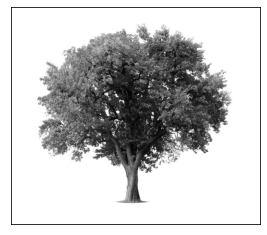

In [100]:
imagem = 'test/arvore.jpg'
print(identificador_de_gatos(imagem, n_comp))
plt.imshow(preto_e_branco(plt.imread(imagem)),cmap=plt.cm.gray) 
plt.xticks(())
plt.yticks(())

(False, 1.2181757456004654e-11)


([], [])

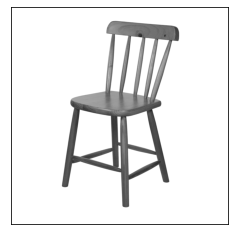

In [101]:
imagem = 'test/cadeira.jpg'
print(identificador_de_gatos(imagem, n_comp))
plt.imshow(preto_e_branco(plt.imread(imagem)),cmap=plt.cm.gray) 
plt.xticks(())
plt.yticks(())

(False, 6.626546840973245e-12)


([], [])

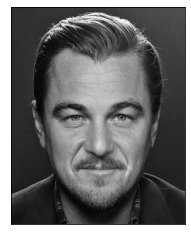

In [102]:
imagem = 'test/pessoa5.jpg'
print(identificador_de_gatos(imagem, n_comp))
plt.imshow(preto_e_branco(plt.imread(imagem)),cmap=plt.cm.gray) 
plt.xticks(())
plt.yticks(())

## Alguns casos que não funcionaram muito bem:

(False, 9.005770751059784e-12)


([], [])

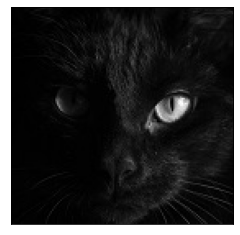

In [118]:
imagem = 'test/gato6.jpg'
print(identificador_de_gatos(imagem, n_comp))
plt.imshow(preto_e_branco(plt.imread(imagem)),cmap=plt.cm.gray) 
plt.xticks(())
plt.yticks(())

(False, 7.49439509867813e-12)


([], [])

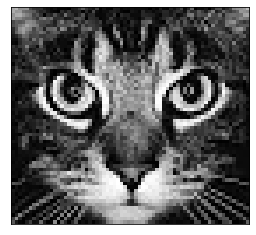

In [112]:
imagem = 'test/gato7.jpg'
print(identificador_de_gatos(imagem, n_comp))
plt.imshow(preto_e_branco(plt.imread(imagem)),cmap=plt.cm.gray) 
plt.xticks(())
plt.yticks(())

(True, 5.5539828505356186e-12)


([], [])

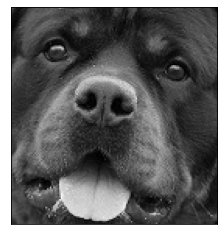

In [117]:
imagem = 'test/rottweiler.jpg'
print(identificador_de_gatos(imagem, n_comp))
plt.imshow(preto_e_branco(plt.imread(imagem)),cmap=plt.cm.gray) 
plt.xticks(())
plt.yticks(())

(True, 3.9360904711167965e-12)


([], [])

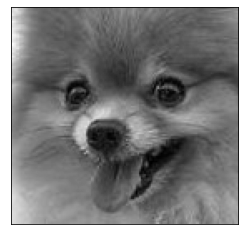

In [114]:
imagem = 'test/cao1.jpg'
print(identificador_de_gatos(imagem, n_comp))
plt.imshow(preto_e_branco(plt.imread(imagem)),cmap=plt.cm.gray) 
plt.xticks(())
plt.yticks(())

(True, 5.738913621127295e-12)


([], [])

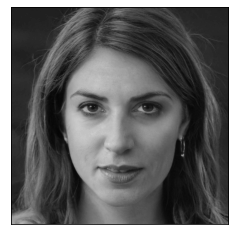

In [107]:
imagem = 'test/pessoa.jpeg'
print(identificador_de_gatos(imagem, n_comp))
plt.imshow(preto_e_branco(plt.imread(imagem)),cmap=plt.cm.gray) 
plt.xticks(())
plt.yticks(())

# Referências:

- STRANG, Gilbert. **Introduction to Linear Algebra.** 5th edition. Wellesley: Cambridge Press, 2016.
- ACAR, Nev. **Eigenfaces: Recovering Humans from Ghosts.** Towards data science, 2018. Disponível em: https://towardsdatascience.com/eigenfaces-recovering-humans-from-ghosts-17606c328184. Data de acesso: 07 de novembro de 2021.
- ZHANG, Sheng; TURK, Matthew. **Eigenfaces.** Scholarpedia, 2008. Disponível em: http://www.scholarpedia.org/article/Eigenfaces. Data de acesso: 15 de novembro de 2021.
- PESSOA, Willian. **Reconhecimento de padrões — Eigenfaces.** Medium, 2019. Disponível em: https://medium.com/@williangp/reconhecimento-de-padr%C3%B5es-eigenfaces-e4cef8f04919. Data de acesso: 16 de novembro de 2021.